!pip install tensorflow

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Training Image Preprocessing

Open this for reference :https://keras.io/api/data_loading/image/

In [2]:
#Loading the dataset using keras library and preprocess
training_set = tf.keras.utils.image_dataset_from_directory(
   'train', #This is directory where images are stored
    labels="inferred", #Labels=inferef shows thst inside train directory more parts are present
    label_mode="categorical",#using label cxategorical as we have multi class prblm
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,#At the time of feeding training model shuffle so bias should be eliminated (Randomly train)
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid', #This is directory where images are stored
    labels="inferred", #Labels=inferef shows thst inside train directory more parts are present
    label_mode="categorical",#using label cxategorical as we have multi class prblm
    class_names=None,
    color_mode="rgb",
    batch_size=32, #At a time we are feedung 32 images of 128*128 and rgb(3) color model
    image_size=(128, 128),
    shuffle=True,#At the time of feeding training model shuffle so bias should be eliminated (Randomly train)
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   

    
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x , y in training_set:
  print(x.shape)
  print(y.shape)
  break;

(32, 128, 128, 3)
(32, 38)


Building an CNN Mode

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))#first layer
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,strides=2))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))#first layer
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))#first layer
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))#first layer
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,strides=2))

We have made deffrent layers with diffrent filters to see or feature scale image from all ends

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1024,activation='relu'))#units in this tell how many neurons in Hidden layer

In [15]:
model.add(Dense(units=38,activation='softmax'))#Here units should be equal to no of Classes(Y)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

Model training

In [2]:
training_historu=model.fit(x=training_set,validation_data=validation_set,epochs=5)

NameError: name 'model' is not defined

In above case as Loss decreses but if loss Increases while going from epoch 1 to 10 then it is an Overshooting Prblm.
To avoid Overshotting Problem follow--->

1.Decrease the learning rate of Optimizer by default it is 0.001 do it 0.0001(see its document)

2.There may be chance of Underfitting,so increse no of Neurons

3.Add mor con layer there may be case that model is unable to extract all features of images so by adding more layers it will generate more feature scale o/p and more characterstics of image can be extracted

4.Add dropout layer after all Con layer and one just before Output Layer.

5.Remove padding from second layers of each conv2D layers so that Total Params can be decresed and training would be fast

In [26]:
#Evaluation Of Training set
train_loss,train_accuracy=model.evaluate(training_set)

2197/2197 [==============================] - 68s 31ms/step - loss: 0.0910 - accuracy: 0.9701


In [27]:
print(train_loss)
print(train_accuracy)

0.09101389348506927
0.9700974225997925


In [28]:
#Evaluation Of Validation set
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 [==============================] - 17s 31ms/step - loss: 0.3276 - accuracy: 0.9123


In [29]:
print(val_loss)
print(val_accuracy)

0.32756850123405457
0.9123036861419678


Saving Model

In [ ]:
model.save('trained_Model.keras')  #There are 2 extension .h5 and .keras to save aur trained model for further use without fiting again,we use .keras as it takes less space then .h5

In [32]:
training_historu.history

{'loss': [1.411339282989502,
  0.43521055579185486,
  0.28907081484794617,
  0.22241750359535217,
  0.1826600283384323,
  0.16321483254432678,
  0.14874717593193054,
  0.13311752676963806,
  0.12876072525978088,
  0.1291193664073944],
 'accuracy': [0.5884344577789307,
  0.8594921231269836,
  0.9039192199707031,
  0.927092969417572,
  0.9386727213859558,
  0.946610689163208,
  0.9520164728164673,
  0.9570239782333374,
  0.9588733315467834,
  0.9590582251548767],
 'val_loss': [0.7628543972969055,
  0.37037745118141174,
  0.34814590215682983,
  0.2731171250343323,
  0.409467488527298,
  0.39956745505332947,
  0.3109074831008911,
  0.49536070227622986,
  0.36784130334854126,
  0.32756829261779785],
 'val_accuracy': [0.7640564441680908,
  0.8777600526809692,
  0.8884589076042175,
  0.9117345809936523,
  0.87992262840271,
  0.8864670991897583,
  0.9117345809936523,
  0.8774755001068115,
  0.9042795300483704,
  0.9123036861419678]}

Record this history of loss and acuuracy of model in Json file

In [33]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_historu.history,f)

In [34]:
training_historu.history ['accuracy']

[0.5884344577789307,
 0.8594921231269836,
 0.9039192199707031,
 0.927092969417572,
 0.9386727213859558,
 0.946610689163208,
 0.9520164728164673,
 0.9570239782333374,
 0.9588733315467834,
 0.9590582251548767]

Acuuracy Visulazitaion

<function matplotlib.pyplot.show(close=None, block=None)>

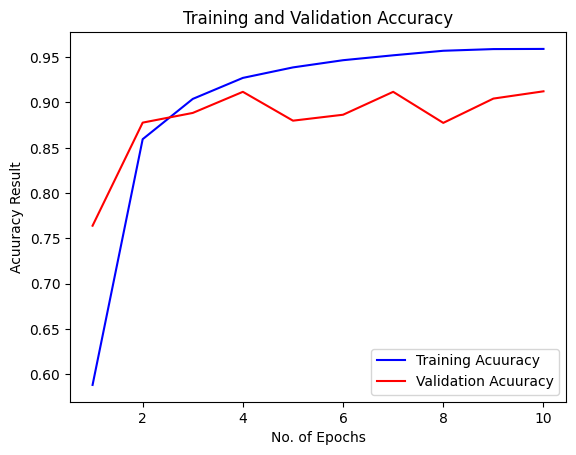

In [36]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_historu.history['accuracy'],color='blue',label='Training Acuuracy')
plt.plot(epochs,training_historu.history['val_accuracy'],color='red',label='Validation Acuuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Acuuracy Result')
plt.show

Using some other metrces to evaluate the mode

In [38]:
#now we will consider valid set as training set for evaluation and doing prediction as it is arranged than test set
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [39]:
#Prediction
y_pred=model.predict(test_set)
y_pred

550/550 [==============================] - 14s 26ms/step


array([[1.0000000e+00, 5.9461984e-13, 3.7811207e-16, ..., 1.5855677e-20,
        3.8751684e-12, 1.1202021e-17],
       [1.0000000e+00, 2.2998743e-09, 1.1289424e-14, ..., 6.4232830e-20,
        4.4878264e-17, 3.7114362e-18],
       [9.9999881e-01, 1.1909340e-09, 2.0154985e-13, ..., 1.7255258e-21,
        1.2213842e-14, 1.7063968e-16],
       ...,
       [1.7959197e-12, 4.0489691e-22, 3.2485757e-15, ..., 2.1509676e-09,
        1.5171633e-13, 9.9996352e-01],
       [1.1723717e-13, 1.4434536e-24, 6.0198622e-21, ..., 1.7233367e-08,
        7.7750409e-16, 9.9996626e-01],
       [1.3323669e-15, 1.4183369e-20, 1.0056442e-12, ..., 6.5204264e-14,
        1.0161453e-11, 9.9991250e-01]], dtype=float32)

In [40]:
y_pred.shape  #It is showing everey image present in files has an Probabality that it belongs to all 38 classes i.e it is showing probablities of each images belonging to 38 classes

(17572, 38)

In [41]:
#Now select the Highest probablity
predicted_categories = tf.argmax(y_pred,axis=1) #It will return the index of max prdiction
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
true_categories = tf.concat([y for  x , y in test_set ],axis=0)  #It will return the true classes of testset in one hot encoding (0001)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [6]:
class_names = training_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.94      0.89       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.90      0.94      0.92       440
                                   Apple___healthy       0.90      0.91      0.91       502
                               Blueberry___healthy       0.88      0.96      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.92      0.88      0.90       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.88      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.91      0.

In [46]:
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[472,   4,   2, ...,   0,   0,   0],
       [  4, 487,   1, ...,   0,   0,   0],
       [  0,   0, 413, ...,   0,   2,   1],
       ...,
       [  0,   0,   0, ..., 464,   0,   0],
       [  1,   0,   0, ...,   0, 438,   0],
       [  0,   0,   0, ...,   0,   0, 463]], dtype=int64)

In [47]:
cm.shape

(38, 38)

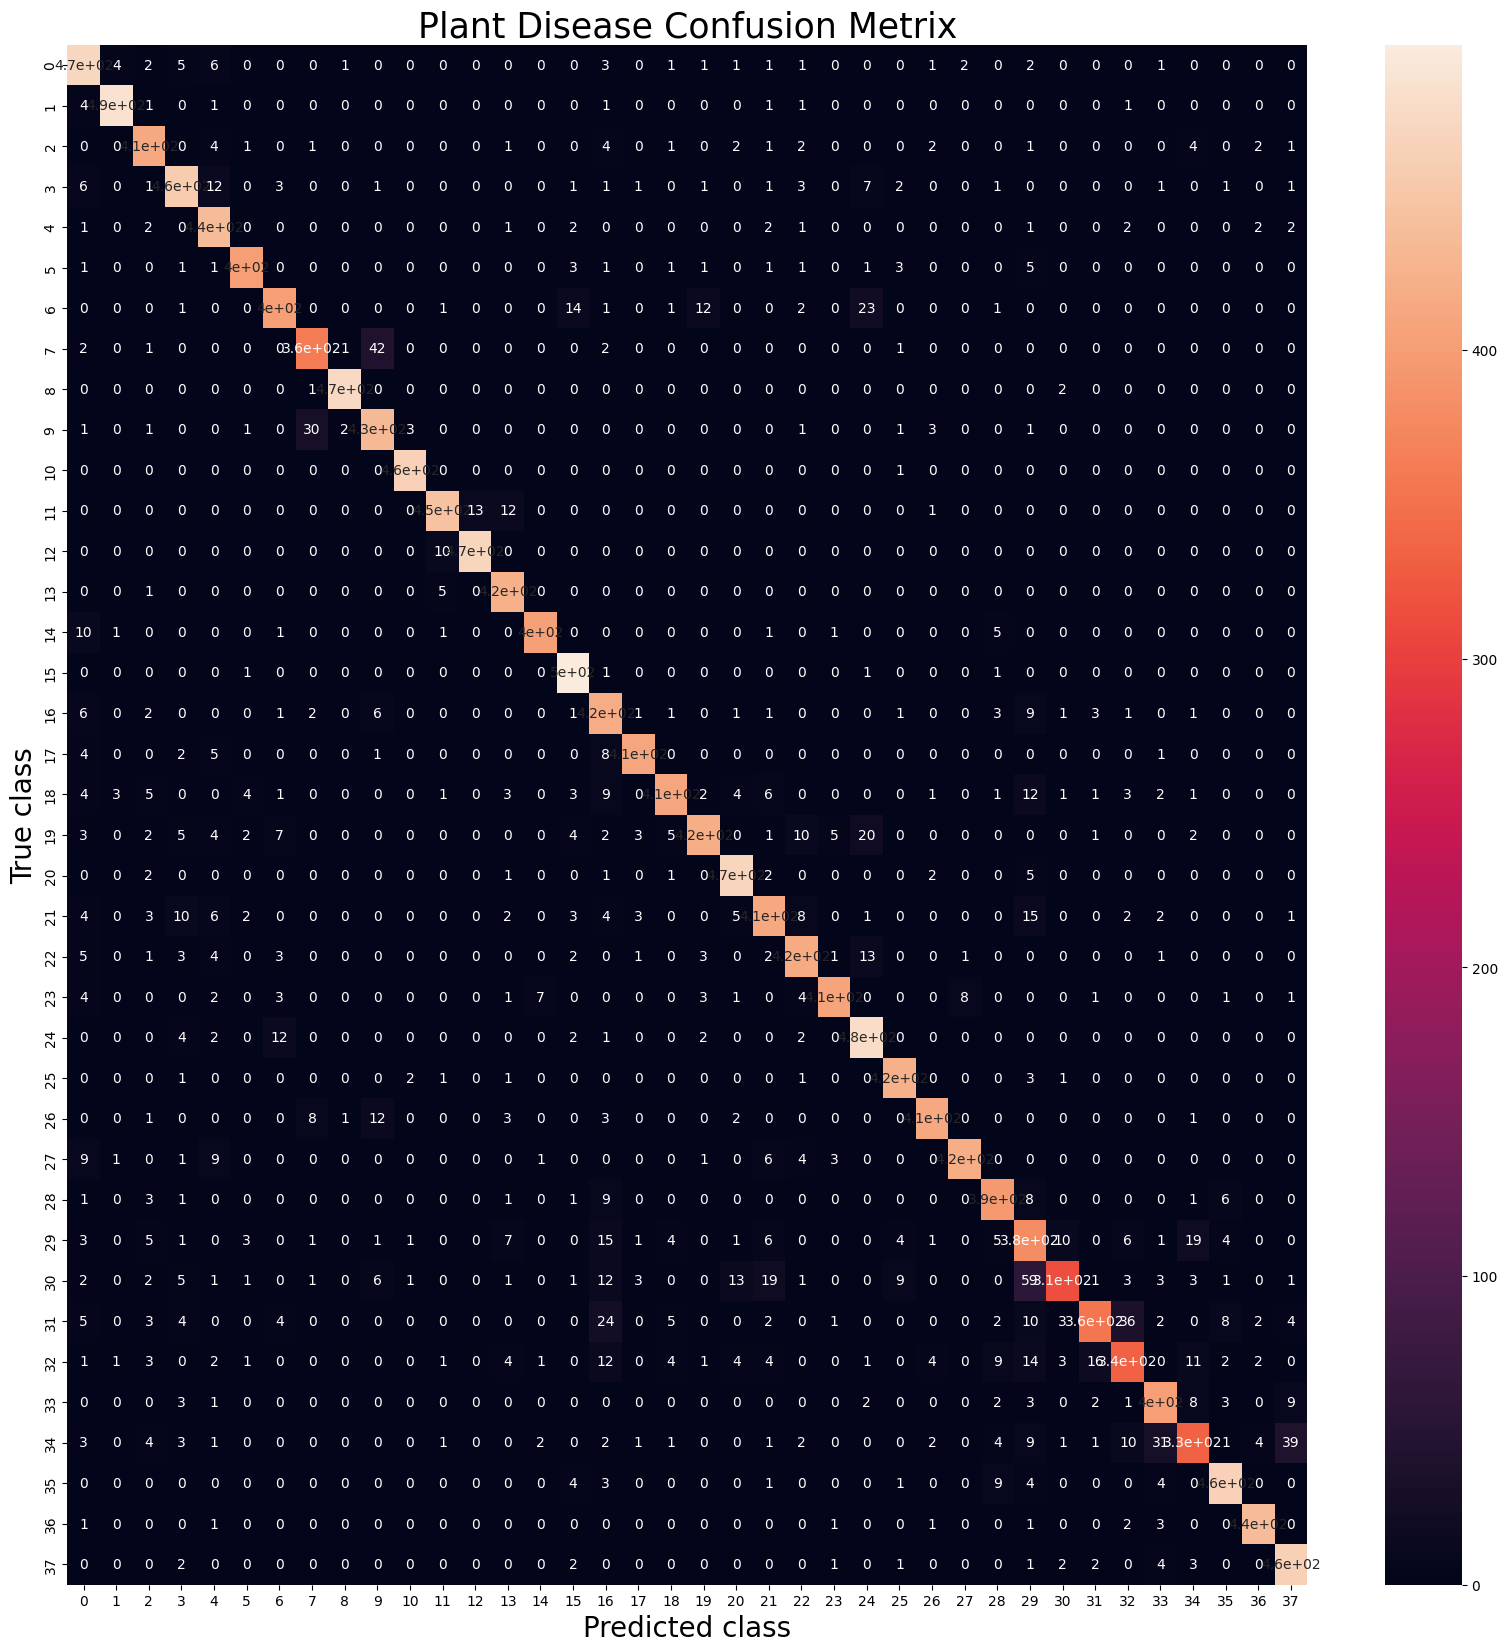

In [48]:
#Visualization of Confusion Metrix
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted class',fontsize=20)
plt.ylabel('True class',fontsize=20)
plt.title("Plant Disease Confusion Metrix",fontsize=25)
plt.show()